## **Exploración y Análisis de los datos**

En este notebook se desarrolla un proceso de EDA de cada una de las tablas transformadas, con el fin de poder aportar insigths que sean relevantes al negocio, además se realiza una busqueda de valores atípicos y se determina como se trabajarán con los mismos.  

**Librerias necesarias:**

In [1]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Carga de Archivos**
- Se cargarán los 3 archivos trabajados en el proceso de transformación. 

In [2]:
#Calendario
calendar_df = pd.read_excel("Datasets\clean_data.xlsx", sheet_name="Calendar")
#Propiedades
properties_df = pd.read_excel("Datasets\clean_data.xlsx", sheet_name="Properties")
#Reservas
booking_df =  pd.read_excel("Datasets\clean_data.xlsx", sheet_name="Bookings")

### **Exploración tabla Calendar**

In [3]:
# Información de la tabla:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38893 entries, 0 to 38892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PropertyId          38893 non-null  int64         
 1   CalendarDate        38893 non-null  datetime64[ns]
 2   Blocked             38893 non-null  int64         
 3   Property_BookingId  38893 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.2 MB


In [4]:
#Determinamos el número de propiedades que estan portafolio
CountProperties=len(calendar_df.PropertyId.unique())
print(f'En total son {CountProperties} propiedades que se tienen en portafolio')

En total son 223 propiedades que se tienen en portafolio


In [5]:
#El rango de fechas que se tiene registro:
dateMin = calendar_df.CalendarDate.min()
dateMax = calendar_df.CalendarDate.max()
dateUnique = len(calendar_df.CalendarDate.unique())
print(f'El rango de fechas ha analizar es de {dateUnique} días y va desde el {dateMin} hasta el {dateMax}')

El rango de fechas ha analizar es de 184 días y va desde el 2022-07-01 00:00:00 hasta el 2022-12-31 00:00:00


Exploramos las propiedades con más reservas en el periodo dado:

In [6]:
# Filtrar las reservas (Blocked = 2) y contar distintivamente por PropertyId
propiedades_con_reservas = calendar_df[calendar_df['Blocked'] == 2]
top_propiedades = propiedades_con_reservas.groupby('PropertyId')['Property_BookingId'].nunique().sort_values(ascending=False).head(10)


In [7]:
# Ordenar el DataFrame por la cantidad de reservas
top_propiedades = top_propiedades.sort_values(ascending=True)

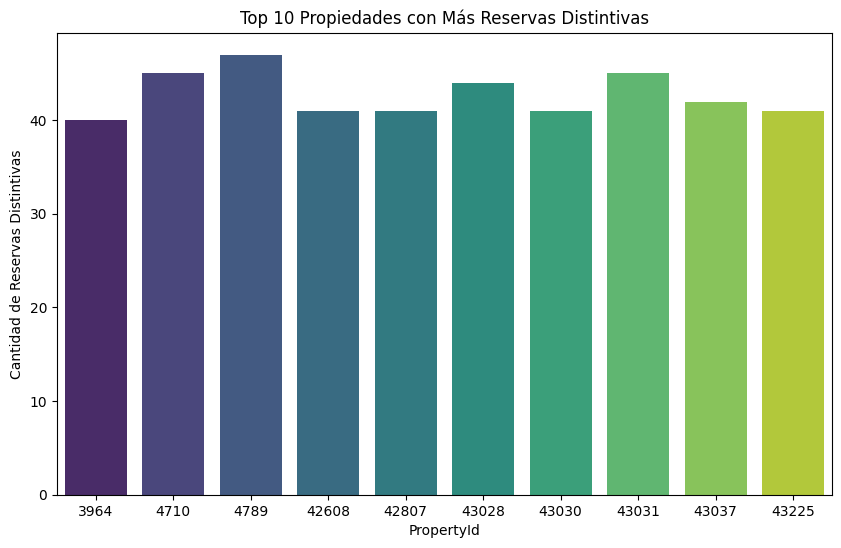

In [8]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_propiedades.index, y=top_propiedades.values, palette='viridis')
plt.title('Top 10 Propiedades con Más Reservas Distintivas')
plt.xlabel('PropertyId')
plt.ylabel('Cantidad de Reservas Distintivas')
plt.show()

La propiedad con mayor cantidad de reservas en el periodo dado fue la de Id = 4789. 

A continuación veremos como se comportaron en general las propiedades de acuerdo al estado; Sin Reserva = 0, Bloqueada = 1 y Reservada = 2:

In [9]:
# Agrupar por PropertyId y contar la cantidad de propiedades en cada estado
count_by_status = calendar_df.groupby(['PropertyId', 'Blocked']).size().unstack(fill_value=0)

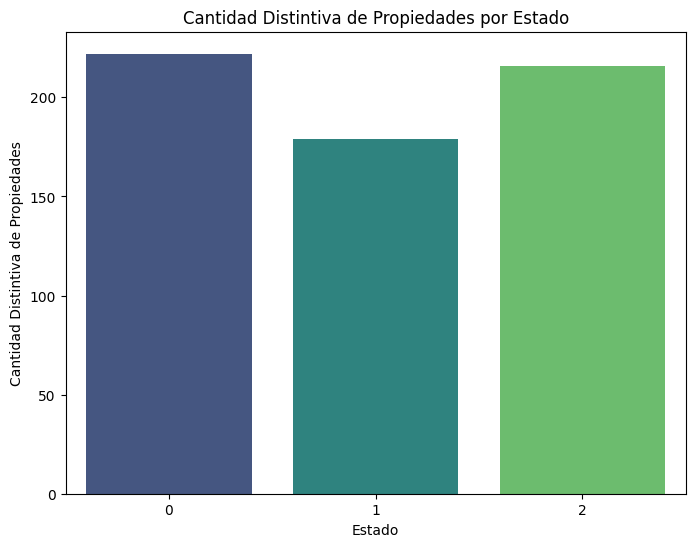

In [10]:
# Filtrar propiedades distintivas por estado
propiedades_distintivas = calendar_df.drop_duplicates(subset=['PropertyId', 'Blocked'])

# Contar la cantidad de propiedades distintivas en cada estado
count_by_status = propiedades_distintivas['Blocked'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=count_by_status.index, y=count_by_status.values, palette='viridis')
plt.title('Cantidad Distintiva de Propiedades por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad Distintiva de Propiedades')
plt.show()

### **Exploración de Properties**


In [11]:
# Información de la tabla Properties
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PropertyId  323 non-null    int64
 1   PR_Sleeps   323 non-null    int64
dtypes: int64(2)
memory usage: 5.2 KB


In [12]:
#Determinamos la cantidad de propiedades en portafolio
cant_properties = len(properties_df.PropertyId.unique())
print(f'La cantidad de propiedades que tiene la empresa en portafolio es {cant_properties}')

La cantidad de propiedades que tiene la empresa en portafolio es 323


En base a este análisis se puede determinar que existe una diferencia de 100 propiedades con la tabla Calendar, eso nos dice que en el periodo de Julio a Diciembre del 2022, 100 propiedades del portafolio no fueron usadas.

Analizamos las estadísticas de la capacidad que tienen las propiedades del portafolio:

In [13]:
# Estadisticas descriptivas de la tabla 
estadisticas = properties_df.PR_Sleeps.describe().round(2)

# Crea un DataFrame con las estadísticas y agrega la unidad
estadisticas_df = pd.DataFrame({'Capacidad (personas)': estadisticas})
estadisticas_df.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Imprime la tabla de estadísticas
estadisticas_df.head(8)

,Capacidad (personas)
count,323.00
mean,4.46
std,1.76
min,1.00
25%,3.50
50%,4.00
75%,6.00
max,9.00


- La capacidad promedio de las propiedades es de 5 personas. 
- Las propiedades más pequeñas tienen capacidad para una persona.
- Las propiedades más grandes tienen capacidad para 9 personas.
- El 50% de las propiedades en portafolio pueden albergar por debajo de las 4 personas.

### **Exploración Bookings**

In [14]:
# Visualizamos la información del dataframe
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6160 entries, 0 to 6159
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Property_BookingId         6160 non-null   int64         
 1   PB_TotalPrice              6160 non-null   float64       
 2   PB_NumNights               6160 non-null   int64         
 3   PB_BookingCreatedDate      6160 non-null   datetime64[ns]
 4   PB_BookingChannelOriginId  6160 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 240.8 KB


In [15]:
# Visualizamos el df
booking_df.sample(5)

,Property_BookingId,PB_TotalPrice,PB_NumNights,PB_BookingCreatedDate,PB_BookingChannelOriginId
2117,107497,1595.75,7,2022-09-04 15:32:13,7
4272,88284,0.01,925,2021-03-19 15:46:53,5
5925,103632,1057.00,7,2022-06-28 10:02:49,7
1843,110216,658.68,4,2022-11-06 15:44:00,7
5166,104243,100.00,4,2022-07-07 08:02:33,7


Definimos el rango de fechas que se tiene registro en Booking:

In [16]:
#El rango de fechas que se tiene registro:
dateMin = booking_df.PB_BookingCreatedDate.min()
dateMax = booking_df.PB_BookingCreatedDate.max()
dateUnique = len(booking_df.PB_BookingCreatedDate.unique())
print(f'El rango de fechas ha analizar es desde el {dateMin} hasta el {dateMax}')

El rango de fechas ha analizar es desde el 2021-03-19 15:46:53 hasta el 2023-01-03 12:50:53


- Existen reservas realizadas desde el mes de Marzo del 2021 y las últimas que se tienen registro son en Enero del 2023.
- Es importante notar que el rango de fechas no es igual al de la tabla Calendar donde vemos el estado de las propiedades. 

Resumen estadístico de las Precios totales de las propiedades y el número de noches reservadas: 

In [17]:
# resumen estadístico
booking_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Property_BookingId,6160.0,106806.259903,2824.790152,88284.0,104659.7500,106937.50,109061.250,112331.0
PB_TotalPrice,6160.0,1381.406125,23057.130190,0.0,611.6975,896.08,1340.145,1809468.0
PB_NumNights,6160.0,5.503084,14.132166,1.0,3.0000,4.00,6.000,925.0
PB_BookingChannelOriginId,6160.0,6.410227,4.665049,1.0,7.0000,7.00,7.000,44.0


Interpretación:

**Precio total: PB_TotalPrice**
- El precio promedio de la totalidad de las reservas es de 1381.41 unidades monetarias.
- La desviación estándar de los precios es alta (23057.13), lo que indica una gran variabilidad en los precios totales de las propiedades.
- El precio minimo de las reservas fue 0 y el maximo de 1,809,468.0, lo que muestra la presencia de valores átipicos que deben ser explorados y tratados de ser el caso.
- El 50% de los precios de las reservas se encuentran por debajo de 896 u.m.

**Número de noches por reserva: PB_NumNights**
- El promedio redondeado de la duración de las reservas es de 6 noches. 
- La desviación estándar de las noches reservadas es 14.13, lo que indica una variabilidad significativa en la duración de las reservas.
- El 50% de las reservas se encuentra por debajo de las 4 noches.
- La duración de las reserva más grande es de 925 noches, lo que es un periodo poco probable por lo que puede tratarse de un valor átipico que se tiene que explorar.

Análisis de los valores atípicos:
- Primero, crearé un diagrama caja para visualizar como están distribuidos los datos:

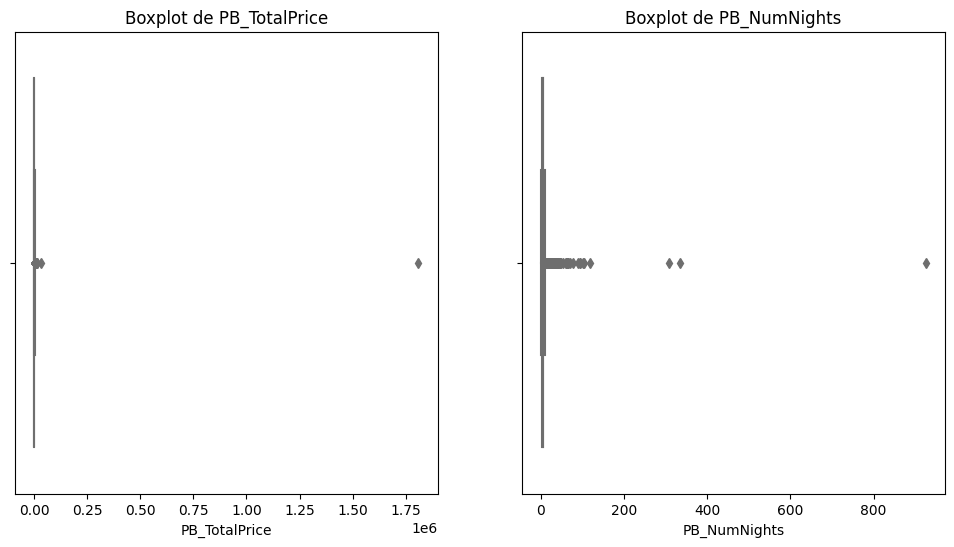

In [18]:
# Ejemplo de boxplots para PB_TotalPrice y PB_NumNights
plt.figure(figsize=(12, 6))

# Boxplot para PB_TotalPrice
plt.subplot(1, 2, 1)
sns.boxplot(x=booking_df['PB_TotalPrice'], color='skyblue')
plt.title('Boxplot de PB_TotalPrice')

# Boxplot para PB_NumNights
plt.subplot(1, 2, 2)
sns.boxplot(x=booking_df['PB_NumNights'], color='lightcoral')
plt.title('Boxplot de PB_NumNights')

plt.show()

Efectivamente existen valores atípicos que afectán a la distribución de los precios y las noches reservadas. Por lo que explorarán estos a más detalle para entender si podrían tratarse de datos verdaderos o errores.

**Valores Atípicos en los precios**

**Precios Altos:**

In [19]:
# Creación de filtro para tener los valores altos
prices_max = booking_df.sort_values(by = 'PB_TotalPrice', ascending= False)
prices_max.head(10)

,Property_BookingId,PB_TotalPrice,PB_NumNights,PB_BookingCreatedDate,PB_BookingChannelOriginId
1585,108110,1809468.00,6,2022-09-15 19:55:33,9
3229,108612,32300.00,334,2022-09-29 16:36:55,5
1744,92866,15241.94,309,2021-09-07 19:30:35,5
3381,97786,11545.36,21,2022-02-22 18:37:29,30
6071,107702,9934.00,93,2022-09-07 00:25:51,7
4894,98797,9502.20,28,2022-03-18 06:22:09,7
5088,106787,8276.00,89,2022-08-23 16:08:47,7
6099,110877,7395.00,95,2022-11-26 19:55:55,7
1180,97726,7138.00,119,2022-02-21 02:35:40,7
3227,105248,6495.06,37,2022-07-24 16:24:28,7


- La reserva con Id = 108110, tiene un valor excesivamente alto que afecta en el promedio de precios. Si bien existe la posibilidad que sea una propiedad de alto valor, no parece adecuarse al promedio de propiedades en cartera.
- La reservas con Id = 108612 y 92866, si bien son altos, parecen estar explicadas por el número de las noches así que se analizará en el apartado de las noches.
- Se revisará la reserva con el precio alto en el cuadro de Calendar para ver si existe o es una reserva para un periodo posterior al análizado:

In [20]:
#Creación de filto donde Id de la reserva coincide con 108110.
filtro_valorA = calendar_df[calendar_df["Property_BookingId"] == 108110]
filtro_valorA

,PropertyId,CalendarDate,Blocked,Property_BookingId
8841,42684,2022-10-05,2,108110
8842,42684,2022-10-06,2,108110
8843,42684,2022-10-07,2,108110
8844,42684,2022-10-08,2,108110
8845,42684,2022-10-09,2,108110
8846,42684,2022-10-10,2,108110


- La reserva efectivamente existe, por lo que la información parece ser veridica y efectivamente podría tratarse de una propiedad de alto valor. Sin embargo al tratarse de un evento único será tratado de manera independiente para no afectar la distribución de los datos. 

In [21]:
# Creación de lista para recoger los ID de las reservas con valores atípicos. 
outliers_prices = [108110]


**Precios Bajos:**

In [22]:
# Creación de filtro para tener los valores bajos
prices_min = booking_df.sort_values(by = 'PB_TotalPrice', ascending= True)
prices_min.head(10)

,Property_BookingId,PB_TotalPrice,PB_NumNights,PB_BookingCreatedDate,PB_BookingChannelOriginId
6133,111343,0.00,16,2022-12-07 10:53:09,5
4537,96030,0.01,64,2021-12-24 10:50:59,5
30,112331,0.01,10,2023-01-03 12:50:53,5
174,108028,0.01,1,2022-09-13 16:38:06,5
4272,88284,0.01,925,2021-03-19 15:46:53,5
620,108766,0.01,2,2022-10-03 15:55:16,5
6154,111819,0.01,2,2022-12-20 15:59:29,5
4118,109228,0.10,77,2022-10-13 10:26:59,5
5916,111438,0.10,2,2022-12-09 17:20:57,5
4022,109255,0.10,6,2022-10-13 18:09:51,5


- Existen reservas con precios 0 o menores a 1, lo que es poco probable debido a la naturaleza del negocio. Además se puede observar que las noches reservadas son considerables.
- Se determinarán la cantidad de reservas con precios por debajo de 1:


In [23]:
# Filtrar las filas donde PB_TotalPrice sea menor a 1
price_1 = booking_df[booking_df['PB_TotalPrice'] < 1]
print(f'Se tiene {len(price_1.Property_BookingId)} reservas con precio menor a 1')

Se tiene 30 reservas con precio menor a 1


Al igual que los precios altos, se corroborará si los Id de reserva existen en la tabla Calendar. Pero primero, se determinará algunos datos importantes sobre estos valores atípicos.

In [24]:
# Estadisticas descriptivas
price_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Property_BookingId,30.0,106460.533333,5535.938214,88284.0,103411.5,108609.0,110516.00,112331.0
PB_TotalPrice,30.0,0.078667,0.039369,0.0,0.1,0.1,0.10,0.1
PB_NumNights,30.0,44.266667,167.493270,1.0,3.0,8.0,13.75,925.0
PB_BookingChannelOriginId,30.0,5.366667,2.008316,5.0,5.0,5.0,5.00,16.0


- Las reservas filtradas por el precio atípico tambien recogen el valor atípico de las noches de reserva de 925. 
- El canal de reserva que registro más estos valores fue el canal 5 y en un caso el canal 16.Se tiene que explorar que esta fallando en esos canales de venta.

Creación de lista de las reservas con precios bajos atípicos:

In [25]:
#Creación de la lista
precios_bajosID = price_1['Property_BookingId'].tolist()
len(precios_bajosID)

30

Verificamos su existencia en la tabla Calendar: 

In [26]:
#Creación de filto donde Id de la reserva coincide con los ID de los precios bajos
filtro_valorB = calendar_df[calendar_df["Property_BookingId"].isin(precios_bajosID)]
len(filtro_valorB['Property_BookingId'].unique())

30

- Efectivamente las 30 reservas existen en el cuadro de booking, por lo que podría tratarse de un error al momento de registrar el precio por el canal 5. 
- Es necesario excluir estos valores atípicos por que no estan acorde al comportamiento promedio de los precios.

**Valores Atípicos en las noches reservadas**

Noches reservadas altas

In [27]:
# Creación de filtro para tener los valores altos
noches_max = booking_df.sort_values(by = 'PB_NumNights', ascending= False)
noches_max.head(15)

,Property_BookingId,PB_TotalPrice,PB_NumNights,PB_BookingCreatedDate,PB_BookingChannelOriginId
4272,88284,0.01,925,2021-03-19 15:46:53,5
3229,108612,32300.00,334,2022-09-29 16:36:55,5
1744,92866,15241.94,309,2021-09-07 19:30:35,5
1180,97726,7138.00,119,2022-02-21 02:35:40,7
3447,105361,6200.00,104,2022-07-26 11:32:37,36
1179,111609,6417.99,102,2022-12-14 22:28:30,7
6099,110877,7395.00,95,2022-11-26 19:55:55,7
6071,107702,9934.00,93,2022-09-07 00:25:51,7
5088,106787,8276.00,89,2022-08-23 16:08:47,7
4118,109228,0.10,77,2022-10-13 10:26:59,5


- La reserva con Id = 88284, consta de 925 noches y como vimos en los precios este es de 0.01. Lo cual parece claramente un error. 
- Se repite el patrón de que el canal 5 cuenta con errores. 

In [28]:
#Creación de filto donde Id de la reserva coincide con 108110.
filtro_valorNA = calendar_df[calendar_df["Property_BookingId"] == 88284]
#Mostramos las primeras 5 filas
filtro_valorNA.head(5)


,PropertyId,CalendarDate,Blocked,Property_BookingId
25485,43171,2022-07-01,2,88284
25486,43171,2022-07-02,2,88284
25487,43171,2022-07-03,2,88284
25488,43171,2022-07-04,2,88284
25489,43171,2022-07-05,2,88284


In [29]:
# Las fechas en la que 
dateMinN= filtro_valorNA['CalendarDate'].min()
dateMaxN = filtro_valorNA['CalendarDate'].max()
print(f'Las fechas de la reserva son entre {dateMinN} y {dateMaxN}')

Las fechas de la reserva son entre 2022-07-01 00:00:00 y 2022-12-31 00:00:00


- La reserva existe en la tabla Calendar y el rango de fechas ocupa todo el periodo dado, por lo que es real en base a la información que se dispone.

Noches reservadas bajas:

In [30]:
# Creación de filtro para tener los valores altos
noches_min = booking_df.sort_values(by = 'PB_NumNights', ascending= True)
noches_min.head(15)

,Property_BookingId,PB_TotalPrice,PB_NumNights,PB_BookingCreatedDate,PB_BookingChannelOriginId
1443,109884,383.43,1,2022-10-27 19:05:50,7
3490,105285,315.83,1,2022-07-25 02:45:22,1
1973,106239,287.78,1,2022-08-13 01:59:59,7
4732,109823,176.40,1,2022-10-26 10:40:15,7
4609,105876,357.26,1,2022-08-05 11:14:22,1
715,103828,340.39,1,2022-07-01 10:13:09,1
4737,110616,153.00,1,2022-11-18 16:29:07,7
3519,104321,438.24,1,2022-07-08 19:48:38,7
2361,109286,377.11,1,2022-10-14 00:31:17,7
2648,105345,355.10,1,2022-07-25 23:40:16,1


- No parecen haber outliers en los valores bajos de las noches reservadas.

### **CREACIÓN DE DATASETS FINALES**

- Como se vio en el proceso de exploración, la tabla Bookings tiene valores atípicos en los precios y número de noches reservadas, que pueden afectar la interpretación o elaboración de un reporte. 
- Es por ello que se tomó la decisión de excluir las reservas con valores en los precios, por que pueden afectar los valores de ADR reales. Analizando independientemente a la propiedad de alto valor.
-  Si bien los datos de reservas también se relacionan con la tabla Calendar, no se tomará medidas en este caso puesto que parece que si muestran valores reales de acuerdo a lo analizado y sirven para mostrar la ocupación real.

Definimos la lista con los ID de las reservas con valores atípicos: 

In [31]:
# Definimos la lista de Outliers como la suma de la lista de reservas con precios menores a 1 y la reserva con valor alto:
outliersList = []
outliersList = precios_bajosID + outliers_prices
len(outliersList)

31

In [32]:
print(outliersList)

[112331, 108028, 108766, 110384, 110848, 108746, 101553, 107027, 110560, 108472, 98247, 103358, 109255, 109228, 88284, 110103, 104042, 96030, 108759, 111418, 108240, 100900, 104256, 102035, 103218, 103572, 111438, 111556, 111343, 111819, 108110]


Creamos el dataset de Bookings sin los outliers:

In [33]:
# Definimos el dataframe de las reservas sin outliers
df_bookingClean = pd.DataFrame()
# Le asignamos los valores
df_bookingClean = booking_df[~booking_df['Property_BookingId'].isin(outliersList)]
df_bookingClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6129 entries, 0 to 6159
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Property_BookingId         6129 non-null   int64         
 1   PB_TotalPrice              6129 non-null   float64       
 2   PB_NumNights               6129 non-null   int64         
 3   PB_BookingCreatedDate      6129 non-null   datetime64[ns]
 4   PB_BookingChannelOriginId  6129 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 287.3 KB


Para verificar el dataset y sus cambios se hará las estadísticas descriptivas y gráficos de distribución:

In [34]:
#Estadísticas descriptivas: 
df_bookingClean.describe().T

,count,mean,std,min,25%,50%,75%,max
Property_BookingId,6129.0,106807.739435,2806.048710,92866.0,104665.00,106932.0,109056.00,112109.0
PB_TotalPrice,6129.0,1093.162240,863.882830,67.5,615.47,898.7,1344.13,32300.0
PB_NumNights,6129.0,5.313265,7.782941,1.0,3.00,4.0,6.00,334.0
PB_BookingChannelOriginId,6129.0,6.414913,4.674103,1.0,7.00,7.0,7.00,44.0


**Precio Total: PB_TotalPrice**
- El precio total promedio sin outliers es de 1093.16 unidades monetarias.
- La desviación estandar sigue siendo alta, lo que refleja la alta variabilidad de los precios de las propiedades del portafolio.
- El 75% de los precios totales de las propiedades reservadas se encuentra por debajo de los 1344.13 u.m.
- EL precio total máximo es de 32,300. 

**Número de noches: PB_NumNights**
- El número de noches promedio que fueron reservadas fue de 5 (redondeado).
- El 75% de número de noches reservadas esta por debajo de 6 noches. 
- La cantidad de noches reservadas más alta es 334 noches.

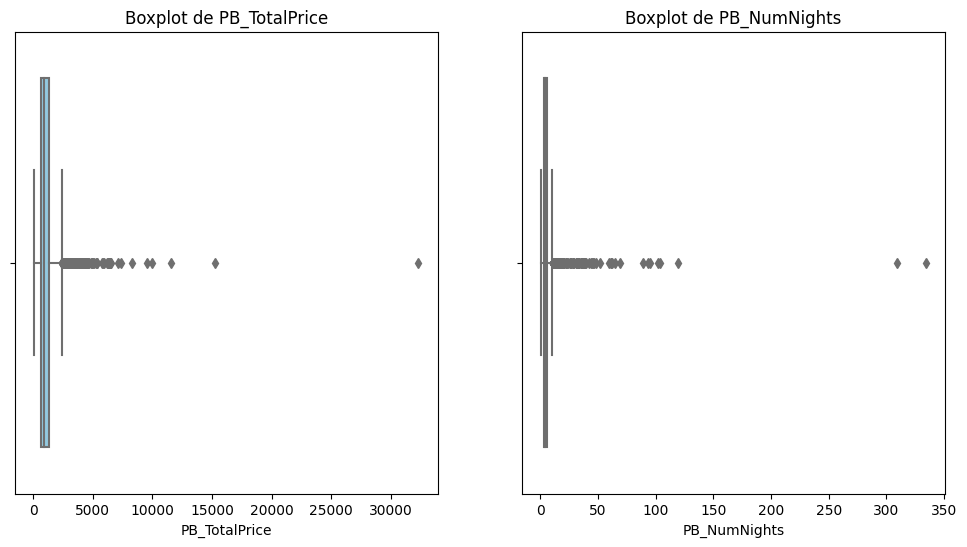

In [35]:
# Ejemplo de boxplots para PB_TotalPrice y PB_NumNights
plt.figure(figsize=(12, 6))

# Boxplot para PB_TotalPrice
plt.subplot(1, 2, 1)
sns.boxplot(x=df_bookingClean['PB_TotalPrice'], color='skyblue')
plt.title('Boxplot de PB_TotalPrice')

# Boxplot para PB_NumNights
plt.subplot(1, 2, 2)
sns.boxplot(x=df_bookingClean['PB_NumNights'], color='lightcoral')
plt.title('Boxplot de PB_NumNights')

plt.show()

- La mayor concentración de los precios se ubican en por debajo de las 5000 unidades monetarias.
- La mayor concentración de las noches reservadas se ubican por de las 50 noches.
- Si bien aún existen valores atípicos estos parecen ser explicados por la diversidad de precios que maneja la empresa en su portafolio. 

Creación de dataset Bookings sin outliers y dataset Bookings de solo Outliers:

In [36]:
#Creamos el archivo excel que contendra las reservas sin outliers.
df_bookingClean.to_excel('Bookings_clean.xlsx', index= False)

Para conservar la información creamos dataset con los unicamente los valores atípicos:

In [37]:
#Creamos el dataset con unicamente los valores atípicos:
df_bookingOutliers = pd.DataFrame()
df_bookingOutliers = booking_df[booking_df['Property_BookingId'].isin(outliersList)]
df_bookingOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 30 to 6154
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Property_BookingId         31 non-null     int64         
 1   PB_TotalPrice              31 non-null     float64       
 2   PB_NumNights               31 non-null     int64         
 3   PB_BookingCreatedDate      31 non-null     datetime64[ns]
 4   PB_BookingChannelOriginId  31 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.5 KB


In [ ]:
# Creamos el archivo excel 
df_bookingOutliers.to_excel('Bookings_Outliers.xlsx', index= False)

**Pasamos al PowerBI!**


-----------